In [1]:
import pandas as pd
import locale
from dateutil.parser import parse
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_html(
    'http://www.cbr.ru/currency_base/dynamics.aspx?VAL_NM_RQ=R01235&date_req1=29.10.2015&date_req2=05.12.2015&rt=1&mode=1', 
    attrs={'class': 'data'}, 
    header=0, 
    parse_dates=True, 
    thousands=' ')[0]
df.rename(columns={u'Дата': 'date', u'Курс': 'rate'}, inplace=True)
df.drop(u'Единиц', axis=1, inplace=True)

In [3]:
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
df['day']=pd.Series(map(lambda el: parse(el, dayfirst=True).strftime('%A'), df['date']))
df['week']=pd.Series(map(lambda el: parse(el,dayfirst=True).strftime('%U'), df['date']))
locale.setlocale(locale.LC_ALL, 'ru_RU.UTF-8')
df['rate'] = map(lambda el: locale.atof(str(el)), df['rate'])
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

A First Level Header
====================

A Second Level Header
---------------------

Now is the time for all good men to come to
the aid of their country. This is just a
regular paragraph.

The quick brown fox jumped over the lazy
dog's back.

### Header 3

> This is a blockquote.
> 
> This is the second paragraph in the blockquote.
>
> ## This is an H2 in a blockquote

In [4]:
df

,date,rate,day,week
0,29.10.2015,65.3159,Thursday,43
1,30.10.2015,64.1686,Friday,43
2,31.10.2015,64.3742,Saturday,43
3,03.11.2015,63.7993,Tuesday,44
4,04.11.2015,63.8525,Wednesday,44
5,06.11.2015,63.3991,Friday,44
6,07.11.2015,63.6832,Saturday,44
7,10.11.2015,64.6606,Tuesday,45
8,11.11.2015,64.3908,Wednesday,45
9,12.11.2015,64.5693,Thursday,45


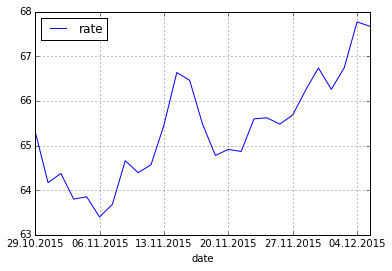

In [5]:
df.plot(x='date', y='rate', grid=True)

In [103]:
d = parse(df['date'][0])

In [163]:
df.groupby('day').max().sort_values(by='rate')

,date,rate
day,,
Wednesday,25.11.2015,66.2584
Tuesday,24.11.2015,66.7370
Thursday,29.10.2015,66.7402
Saturday,31.10.2015,67.6698
Friday,30.10.2015,67.7691


In [6]:
df_grouped = df.groupby('week')

In [174]:
df_grouped.get_group('45')

,date,rate,day,week
7,10.11.2015,64.6606,Tuesday,45
8,11.11.2015,64.3908,Wednesday,45
9,12.11.2015,64.5693,Thursday,45
10,13.11.2015,65.4541,Friday,45
11,14.11.2015,66.6343,Saturday,45


In [8]:
df_grouped.groups

{'43': [0, 1, 2],
 '44': [3, 4, 5, 6],
 '45': [7, 8, 9, 10, 11],
 '46': [12, 13, 14, 15, 16],
 '47': [17, 18, 19, 20, 21],
 '48': [22, 23, 24, 25, 26]}

In [9]:
df_grouped.get_group('47')

,date,rate,day,week
17,24.11.2015,65.5973,Tuesday,47
18,25.11.2015,65.6210,Wednesday,47
19,26.11.2015,65.4789,Thursday,47
20,27.11.2015,65.6836,Friday,47
21,28.11.2015,66.2393,Saturday,47


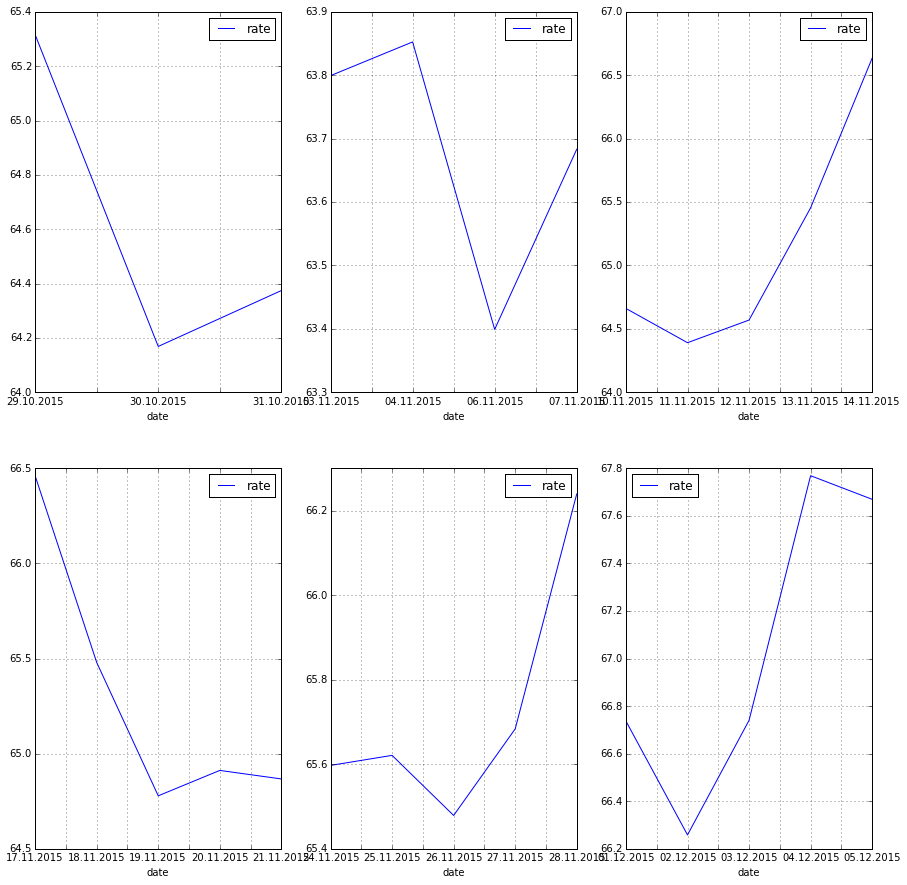

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,15))
df_grouped.get_group('43').plot(ax=axes[0,0],x='date',y='rate', grid=True);
df_grouped.get_group('44').plot(ax=axes[0,1],x='date',y='rate', grid=True);
df_grouped.get_group('45').plot(ax=axes[0,2],x='date',y='rate', grid=True);
df_grouped.get_group('46').plot(ax=axes[1,0],x='date',y='rate', grid=True);
df_grouped.get_group('47').plot(ax=axes[1,1],x='date',y='rate', grid=True);
df_grouped.get_group('48').plot(ax=axes[1,2],x='date',y='rate', grid=True);